<a href="https://colab.research.google.com/github/dpetrovic89/NLP-Text-Sentiment-Classification-Bert/blob/main/NLP_Text_Sentiment_Classification_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB Sentiment Classifier
What is Sentiment Analysis?

Sentiment analysis is a natural language processing technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.


ktrain is a Python library that makes deep learning and AI more accessible and easier to apply

In [1]:
pip install ktrain


     |████████████████████████████████| 25.3MB 129kB/s 
     |████████████████████████████████| 6.8MB 24.0MB/s 
     |████████████████████████████████| 983kB 53.1MB/s 
     |████████████████████████████████| 266kB 48.4MB/s 
     |████████████████████████████████| 1.3MB 48.9MB/s 
     |████████████████████████████████| 1.2MB 51.1MB/s 
     |████████████████████████████████| 471kB 48.8MB/s 
     |████████████████████████████████| 2.9MB 51.7MB/s 
     |████████████████████████████████| 890kB 53.7MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.4-cp36-none-any.whl size=25276443 sha256=42c8fbf0e4f208c4059fa5ba52d0ff6107b42a8eef5cee8435e11735a81db36a
  Stored in directory: /root/.cache/pip/wheels/1b/77/8a/bdceaabc308e7178d575278bf6143b7d1a9b939a1e40c56b88
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=86786d7d08993ccacb518417ff37663180fbee67a73f7822fc8a3374a15ee955
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [2]:
#Importing
import ktrain
from ktrain import text


# Large Movie Review Dataset

This is a dataset for binary sentiment classification.

25,000 movie reviews for training, and 25,000 for testing.

In [3]:
# Dataset
import tensorflow as tf
dataset = tf.keras.utils.get_file(
    fname="aclImdb.tar.gz", 
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
    extract=True,
)


84131840/84125825 [==============================] - 7s 0us/step


In [18]:
%cd /root/.keras/datasets/aclImdb
!ls


/root/.keras/datasets/aclImdb
imdbEr.txt  imdb.vocab	README	test  train


In [5]:
# set path to dataset
import os.path
dataset = '/root/.keras/datasets/aclImdb'
IMDB_DATADIR = os.path.join(os.path.dirname(dataset), 'aclImdb')
print(IMDB_DATADIR)


/root/.keras/datasets/aclImdb


In [ ]:
import pandas a pd 
df = pd.read_csv()

# STEP 1: Preprocessing
The texts_from_folder function will load the training and validation data from the specified folder and automatically preprocess it according to BERT's requirements. In doing so, the BERT model and vocabulary will be automatically downloaded.


In [6]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(IMDB_DATADIR, 
                                                                       maxlen=500, 
                                                                       preprocess_mode='bert',
                                                                       train_test_names=['train', 
                                                                                         'test'],
                                                                       classes=['pos', 'neg'])


detected encoding: utf-8
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


# STEP 2: Loading a pre trained BERT and wrapping it in a ktrain.learner object


In [7]:
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model,train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=6)


Is Multi-Label? False
maxlen is 500
done.


# STEP 3: Training and Tuning the model's parameters¶


In [8]:
# One epoch takes around one hour on GPU Google Colab. 

learner.fit_onecycle(2e-5, 2)




begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
4167/4167 [==============================] - 3404s 812ms/step - loss: 0.3463 - accuracy: 0.8405 - val_loss: 0.1794 - val_accuracy: 0.9323
Epoch 2/2
4167/4167 [==============================] - 3373s 810ms/step - loss: 0.1415 - accuracy: 0.9477 - val_loss: 0.1577 - val_accuracy: 0.9424


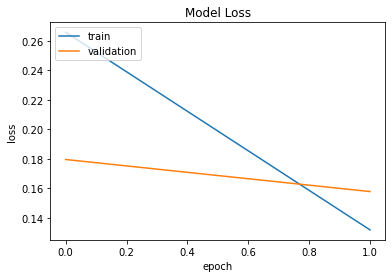

In [10]:
# we should train longer to get better accuracy. try 4 instead of 2 epoch

learner.plot()